# 최적의 토픽 갯수 구하기

#### review 데이터 수집 및 전처리

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

df = pd.read_csv('./data/review_12.csv', encoding='utf-8') # 데이터 위치 주의

df

,review
0,"인셉션은 대단하다 느꼈는데, 인터스텔라는 경이롭다고 느껴진다."
1,결론만 말하자면 대박이다 더이상 어떤단어로 칭찬해야하는지도모르겠다.약 3시간의 긴러...
2,전율과 환희의 169분이였다. 그 어떤 영화도 시도한 적 없는 명석함과 감동이 담겨...
3,이 영화가 명량이나 도둑들보다 관객수가 적다면 진짜 부끄러울듯
4,"팝콘, 콜라 사가지 마라.. 먹을시간 없다"
...,...
3267,인류는 걍 다 d져야한다....쓰레기들 살아서 머하니? 전 우주를 다 쓰레기통으로만...
3268,초반에 너무 밑밥을 마니깔고 지루했음 전체적으로 작품성은 높음 2시간 30 .
3269,과대포장 풀기운동 동참 영환재밋게봄 리뷰다읽고보면 졸게됩니다
3270,솔직히 9점대는 아니다 7점정도.. 고로 1점준다


In [3]:
df = df.dropna(how = 'any') # 결측치 제거
df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

okt = Okt()
tokenized_data = []

for sentence in df['review']:
    temp_X = okt.nouns(sentence) # 명사만 추출
    temp_X = [word for word in temp_X if len(word)>1] # 2글자 이상만 추출
    tokenized_data.append(temp_X)

pd.DataFrame(tokenized_data).to_csv('./data/review_tokenized.csv')

C:\Users\alsgu\AppData\Local\Temp/ipykernel_7760/1818904960.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['review'] = df['review'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [4]:
pd.DataFrame(tokenized_data)

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,인셉션,인터스텔라,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,결론,대박,이상,단어,칭찬,시간,러닝,타임,시간,상황,...,명작,몇번,None,None,None,None,None,None,None,None
2,전율,환희,영화,시도,감동,영화,놀란,야심,능력,존경,...,None,None,None,None,None,None,None,None,None,None
3,영화,명량,도둑,관객수,진짜,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,팝콘,콜라,시간,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3267,인류,쓰레기,우주,쓰레기통,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3268,초반,밑밥,전체,작품,성은,시간,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3269,과대,포장,풀기,운동,동참,환재,리뷰,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3270,정도,고로,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


#### 시각화를 위한 pyLDAvis 설치

In [5]:
!pip install pyLDAvis

#### 토픽 갯수별 응집도 구하기

100%|██████████| 3273/3273 [00:00<00:00, 408874.37it/s]
2022-05-22 19:22:21,292 : INFO : using symmetric alpha at 0.5
2022-05-22 19:22:21,292 : INFO : using symmetric eta at 0.5
2022-05-22 19:22:21,293 : INFO : using serial LDA version on this node
2022-05-22 19:22:21,297 : INFO : running online (single-pass) LDA training, 2 topics, 1 passes over the supplied corpus of 3273 documents, updating model once every 2000 documents, evaluating perplexity every 3273 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-22 19:22:21,298 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-05-22 19:22:21,298 : INFO : PROGRESS: pass 0, at document #2000/3273


Number of unique tokens: 246
Number of documents: 3273


2022-05-22 19:22:22,282 : INFO : merging changes from 2000 documents into a model of 3273 documents
2022-05-22 19:22:22,287 : INFO : topic #0 (0.500): 0.026*"감독" + 0.023*"상상력" + 0.021*"사람" + 0.019*"보고" + 0.019*"그냥" + 0.019*"이해" + 0.018*"과학" + 0.016*"평점" + 0.016*"정도" + 0.015*"처음"
2022-05-22 19:22:22,288 : INFO : topic #1 (0.500): 0.030*"인생" + 0.021*"다시" + 0.020*"대박" + 0.020*"보고" + 0.019*"인터스텔라" + 0.019*"한번" + 0.018*"이해" + 0.017*"과학" + 0.016*"처음" + 0.015*"그냥"
2022-05-22 19:22:22,290 : INFO : topic diff=0.674233, rho=1.000000
2022-05-22 19:22:22,788 : INFO : -5.542 per-word bound, 46.6 perplexity estimate based on a held-out corpus of 1273 documents with 3086 words
2022-05-22 19:22:22,788 : INFO : PROGRESS: pass 0, at document #3273/3273
2022-05-22 19:22:23,124 : INFO : merging changes from 1273 documents into a model of 3273 documents
2022-05-22 19:22:23,125 : INFO : topic #0 (0.500): 0.031*"감독" + 0.028*"사람" + 0.026*"평점" + 0.024*"상상력" + 0.021*"정도" + 0.020*"이해" + 0.020*"그냥" + 0.018*"보고" +

2022-05-22 19:22:32,727 : INFO : 7 accumulators retrieved from output queue
2022-05-22 19:22:32,828 : INFO : accumulated word occurrence stats for 2471 virtual documents
2022-05-22 19:22:33,596 : INFO : using symmetric alpha at 0.05
2022-05-22 19:22:33,598 : INFO : using symmetric eta at 0.05
2022-05-22 19:22:33,599 : INFO : using serial LDA version on this node
2022-05-22 19:22:33,602 : INFO : running online (single-pass) LDA training, 20 topics, 1 passes over the supplied corpus of 3273 documents, updating model once every 2000 documents, evaluating perplexity every 3273 documents, iterating 50x with a convergence threshold of 0.001000
2022-05-22 19:22:33,602 : WARNING : too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
2022-05-22 19:22:33,603 : INFO : PROGRESS: pass 0, at document #2000/3273
2022-05-22 19:22:34,048 : INFO : merging changes from 2000 documents into a model of 3273 documents
2022-05-22 19:22:34,049

2022-05-22 19:22:44,048 : INFO : topic #1 (0.031): 0.092*"다시" + 0.052*"극장" + 0.039*"이영화" + 0.033*"인간" + 0.033*"보고" + 0.026*"상상" + 0.026*"차원" + 0.026*"몇번" + 0.026*"집중" + 0.020*"자체"
2022-05-22 19:22:44,048 : INFO : topic #16 (0.031): 0.056*"과학" + 0.037*"이해" + 0.034*"상상" + 0.031*"사랑" + 0.031*"작품" + 0.025*"처음" + 0.025*"대한" + 0.025*"어디" + 0.025*"전혀" + 0.025*"내용"
2022-05-22 19:22:44,049 : INFO : topic diff=21.850052, rho=1.000000
2022-05-22 19:22:44,621 : INFO : -7.062 per-word bound, 133.6 perplexity estimate based on a held-out corpus of 1273 documents with 3086 words
2022-05-22 19:22:44,621 : INFO : PROGRESS: pass 0, at document #3273/3273
2022-05-22 19:22:45,048 : INFO : merging changes from 1273 documents into a model of 3273 documents
2022-05-22 19:22:45,051 : INFO : topic #30 (0.031): 0.071*"차원" + 0.054*"판타지" + 0.045*"내용" + 0.032*"시각" + 0.030*"그대로" + 0.030*"그래픽" + 0.029*"평가" + 0.024*"얼마나" + 0.022*"한마디" + 0.022*"호불호"
2022-05-22 19:22:45,053 : INFO : topic #18 (0.031): 0.105*"처음" + 0.09

2022-05-22 19:22:57,406 : INFO : topic #19 (0.023): 0.133*"장면" + 0.103*"재미" + 0.076*"흥미" + 0.056*"의미" + 0.041*"중간" + 0.036*"계속" + 0.031*"부분" + 0.028*"과학" + 0.028*"느낌" + 0.025*"상영"
2022-05-22 19:22:57,408 : INFO : topic diff=0.533274, rho=0.707107
2022-05-22 19:22:57,420 : INFO : using ParallelWordOccurrenceAccumulator(processes=7, batch_size=64) to estimate probabilities from sliding windows
2022-05-22 19:22:59,404 : INFO : 7 accumulators retrieved from output queue
2022-05-22 19:22:59,492 : INFO : accumulated word occurrence stats for 2605 virtual documents


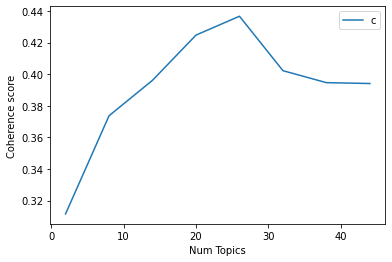

In [1]:
from tqdm import tqdm
from gensim.models.ldamodel import LdaModel 
from gensim.models.callbacks import CoherenceMetric 
from gensim import corpora 
from gensim.models.callbacks import PerplexityMetric 
import logging 
import pyLDAvis.gensim_models
from gensim.models.coherencemodel import CoherenceModel 
import matplotlib.pyplot as plt 

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3): # 응집도 계산
    coherence_values = [] 
    model_list = [] 
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model) 
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence()) 
    return model_list, coherence_values 

def find_optimal_number_of_topics(dictionary, corpus, processed_data): # 토픽갯수별 응집도 그래프
    limit = 50; #토픽 마지막갯수
    start = 2; #토픽 시작갯수
    step = 6; 
    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, 
                                                            texts=processed_data, start=start, limit=limit, step=step) 
    x = range(start, limit, step) 
    plt.plot(x, coherence_values) 
    plt.xlabel("Num Topics") 
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best') 
    plt.show() 


processed_data = [sent.strip().split(",") for sent in tqdm(open('./data/review_tokenized.csv', 'r', encoding='utf-8').readlines())]
dictionary = corpora.Dictionary(processed_data) 
dictionary.filter_extremes(no_below=10, no_above=0.05) # 출현빈도가 적거나 자주 등장하는 단어는 제거 
corpus = [dictionary.doc2bow(text) for text in processed_data]
print('Number of unique tokens: %d' % len(dictionary)) 
print('Number of documents: %d' % len(corpus))
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO) 
    
# 최적의 토픽 수 찾기 
find_optimal_number_of_topics(dictionary, corpus, processed_data)


- 응집도가 가장 높을 때 토픽수로 설정이 좋지만 토픽이 너무 많으면 그또한 안좋기 때문에 적절한 토픽수가 중요함